In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Groceries_dataset.csv')  # or the correct path to your dataset file

# Convert Date to datetime format if needed
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a unique transaction ID by combining Member_number and Date
df['Transaction_ID'] = df['Member_number'].astype(str) + '_' + df['Date'].dt.strftime('%Y-%m-%d')

# Group items by each transaction
transactions = df.groupby('Transaction_ID')['itemDescription'].apply(list)


In [2]:
df.head()

,Member_number,Date,itemDescription,Transaction_ID
0,1808,2015-07-21,tropical fruit,1808_2015-07-21
1,2552,2015-01-05,whole milk,2552_2015-01-05
2,2300,2015-09-19,pip fruit,2300_2015-09-19
3,1187,2015-12-12,other vegetables,1187_2015-12-12
4,3037,2015-02-01,whole milk,3037_2015-02-01


In [20]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(38765, 4)

In [3]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


In [40]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Convert the DataFrame to a list of transactions (group by Member_number)
transactions = df.groupby("Member_number")["itemDescription"].apply(list).tolist()

# Step 2: Apply TransactionEncoder to convert the list of transactions into one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert the encoded data into a DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Step 3: Run the Apriori algorithm to get frequent itemsets with min_support=0.05
frequent_itemsets = apriori(df_encoded, min_support=0.08, use_colnames=True)

# Step 4: Generate association rules with a lift metric and min_threshold=1.0
# Use num_itemsets to limit the number of itemsets considered
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=5)

# Display the generated rules
print(rules)


                       antecedents                     consequents  \
0                   (bottled beer)                    (whole milk)   
1                     (whole milk)                  (bottled beer)   
2                  (bottled water)              (other vegetables)   
3               (other vegetables)                 (bottled water)   
4                  (bottled water)                    (whole milk)   
..                             ...                             ...   
59        (rolls/buns, whole milk)              (other vegetables)   
60  (other vegetables, whole milk)                    (rolls/buns)   
61                    (rolls/buns)  (other vegetables, whole milk)   
62              (other vegetables)        (rolls/buns, whole milk)   
63                    (whole milk)  (rolls/buns, other vegetables)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.158799            0.458184  0.085428    0.537964  1.174124   
1  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
# Print frequent itemsets
print(frequent_itemsets)

# Print association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


     support                                    itemsets
0   0.119548                                      (beef)
1   0.158799                              (bottled beer)
2   0.213699                             (bottled water)
3   0.135967                               (brown bread)
4   0.126475                                    (butter)
..       ...                                         ...
60  0.151103                          (soda, whole milk)
61  0.097486                              (yogurt, soda)
62  0.116470                (tropical fruit, whole milk)
63  0.150590                        (yogurt, whole milk)
64  0.082093  (rolls/buns, other vegetables, whole milk)

[65 rows x 2 columns]
                       antecedents                     consequents   support  \
0                   (bottled beer)                    (whole milk)  0.085428   
1                     (whole milk)                  (bottled beer)  0.085428   
2                  (bottled water)              (othe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Convert the DataFrame to a list of transactions (group by Member_number)
transactions = df.groupby("Member_number")["itemDescription"].apply(list).tolist()

# Step 2: Apply TransactionEncoder to convert the list of transactions into one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert the encoded data into a DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Step 3: Run the Apriori algorithm to get frequent itemsets with min_support=0.05
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Step 4: Generate association rules with a lift metric and min_threshold=1.0
# Use num_itemsets to limit the number of itemsets considered
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=5)

# Step 5: Print the association rules in the format: antecedents -> consequents
for _, row in rules.iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    print(f"{antecedents} -> {consequents}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


beef -> other vegetables
other vegetables -> beef
beef -> whole milk
whole milk -> beef
bottled beer -> other vegetables
other vegetables -> bottled beer
rolls/buns -> bottled beer
bottled beer -> rolls/buns
bottled beer -> soda
soda -> bottled beer
bottled beer -> whole milk
whole milk -> bottled beer
bottled water -> other vegetables
other vegetables -> bottled water
rolls/buns -> bottled water
bottled water -> rolls/buns
bottled water -> root vegetables
root vegetables -> bottled water
bottled water -> soda
soda -> bottled water
bottled water -> tropical fruit
tropical fruit -> bottled water
bottled water -> whole milk
whole milk -> bottled water
bottled water -> yogurt
yogurt -> bottled water
other vegetables -> brown bread
brown bread -> other vegetables
rolls/buns -> brown bread
brown bread -> rolls/buns
brown bread -> whole milk
whole milk -> brown bread
other vegetables -> butter
butter -> other vegetables
butter -> whole milk
whole milk -> butter
other vegetables -> canned bee

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


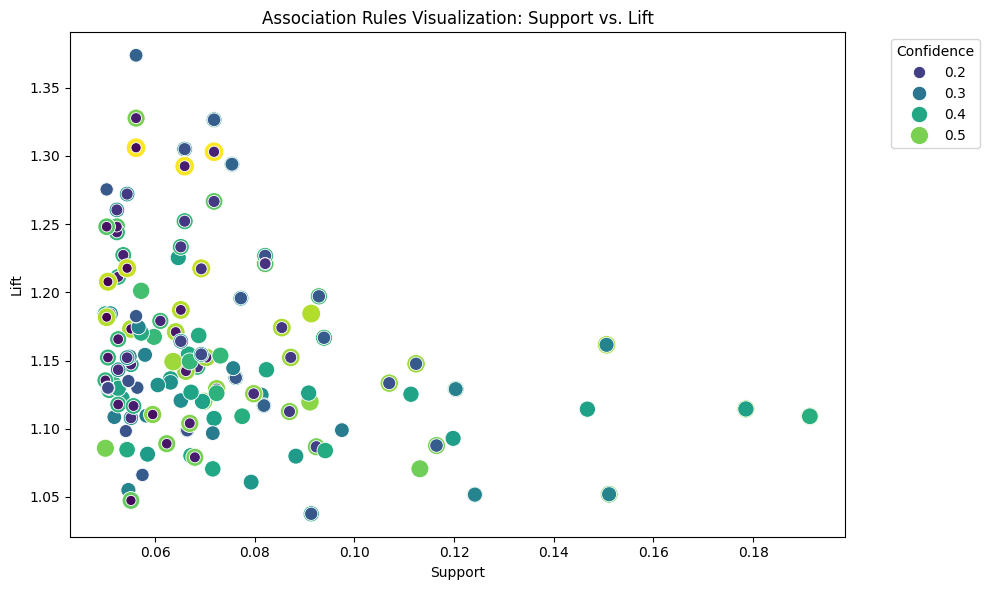

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rules' is your association rules DataFrame
plt.figure(figsize=(10, 6))

# Scatter plot with support on x-axis, lift on y-axis, and confidence as the size of the points
sns.scatterplot(x='support', y='lift', size='confidence', data=rules, hue='confidence', palette='viridis', sizes=(50, 200))

plt.title('Association Rules Visualization: Support vs. Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.legend(title='Confidence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


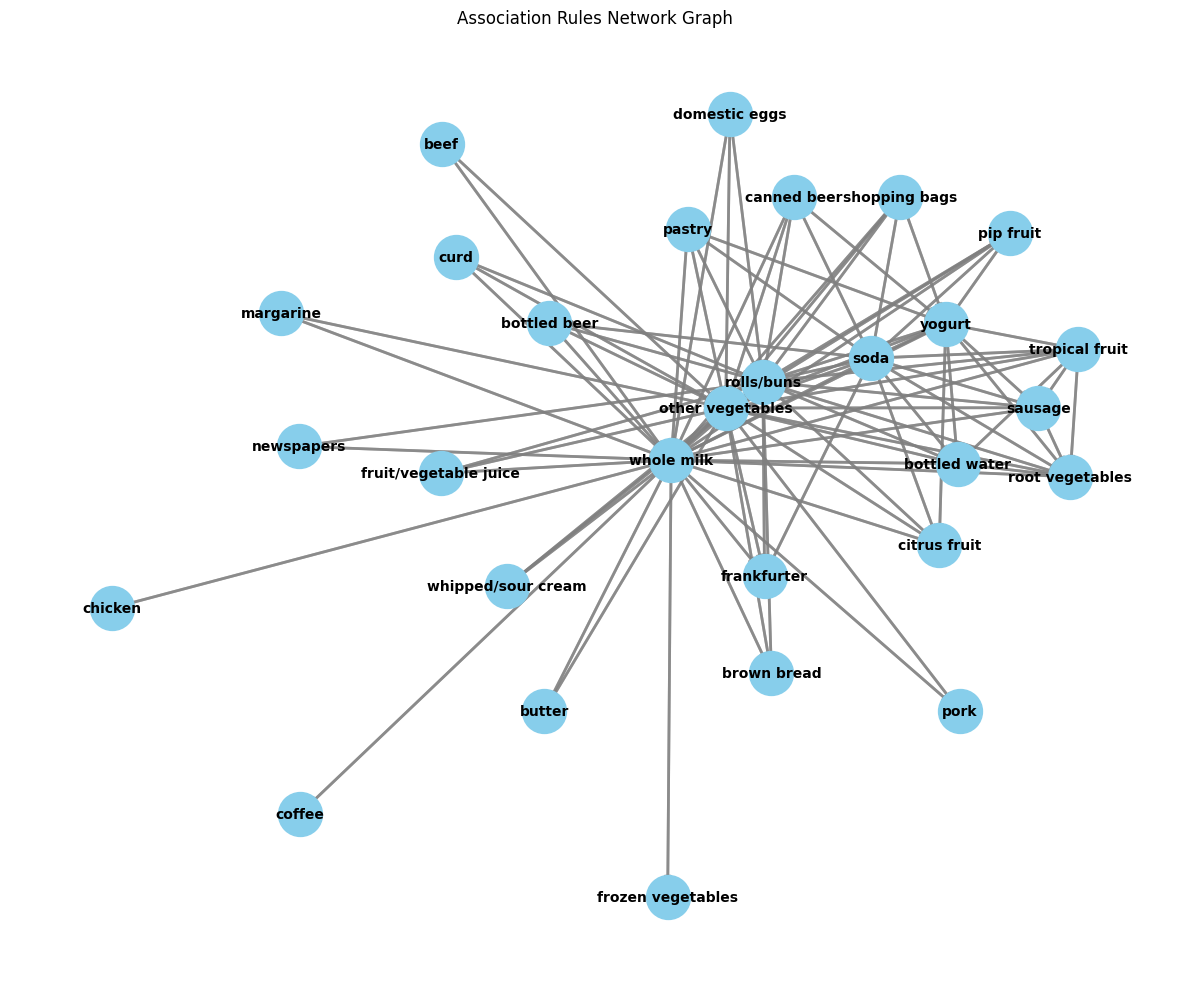

In [36]:
import networkx as nx

# Create a directed graph for visualization
G = nx.DiGraph()

# Add edges (rules) to the graph
for _, row in rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # Node positions
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color='grey')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
plt.title('Association Rules Network Graph')
plt.axis('off')
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample DataFrame (df) and association rules (rules) are assumed to be loaded.

# Define product categories and items
product_categories = {
    'Fruits': ['tropical fruit', 'pip fruit', 'apple', 'banana'],
    'Dairy': ['whole milk', 'yogurt', 'UHT-milk'],
    'Beverages': ['soda', 'bottled beer', 'beverages'],
    'Vegetables': ['other vegetables', 'potato', 'cabbage'],
    'Snacks': ['rolls/buns', 'beef', 'berries'],
}

# Flatten the categories into a single list of items with corresponding item numbers
all_items = []
item_index = {}

# Generate a list of all items and assign a unique number to each item
item_number = 1
for category, items in product_categories.items():
    for item in items:
        all_items.append(item)
        item_index[item_number] = item
        item_number += 1

# Function to display all available items and allow user to select by item number
def get_user_input():
    print("\nAvailable items for purchase:")
    for number, item in item_index.items():
        print(f"{number}. {item}")

    # Get user input for item selections
    item_choices = input("\nSelect the items you've purchased (enter numbers separated by commas): ").strip()

    # Split the input into a list of integers, handle any invalid input
    try:
        selected_item_numbers = list(map(int, item_choices.split(',')))
    except ValueError:
        print("Invalid input. Please enter numbers separated by commas.")
        return get_user_input()  # Recursively call the function for valid input

    # Map item numbers to item names
    selected_items = [item_index[num] for num in selected_item_numbers if num in item_index]

    # If no valid items are selected, ask the user again
    if not selected_items:
        print("No valid items selected. Please try again.")
        return get_user_input()

    return selected_items

# Function to recommend products based on selected items and association rules
def recommend_products(purchased_items, rules):
    recommendations = set()

    # Find association rules where the purchased item is the antecedent
    for _, row in rules.iterrows():
        if set(purchased_items).intersection(row['antecedents']):
            recommendations.update(row['consequents'])

    return recommendations

# Function to display choices
def display_choices():
    print("\nChoose one of the following options:")
    print("1. Get product recommendations based on purchased items.")
    print("2. Exit")

    choice = input("Enter your choice (1/2): ")
    return choice

# Main function to run the program
def main():
    # User input for purchased items
    purchased_items = get_user_input()

    while True:
        choice = display_choices()

        if choice == '1':
            recommendations = recommend_products(purchased_items, rules)
            if recommendations:
                print("\nRecommended Products (based on your purchase):")
                for item in recommendations:
                    print(f"- {item}")
            else:
                print("No recommendations found based on your purchased items.")

        elif choice == '2':
            print("Exiting the program.")
            break

        else:
            print("Invalid choice, please try again.")

        # Allow user to add more items to their list or exit
        more_items = input("\nDo you want to add more items? (yes/no): ").strip().lower()
        if more_items == 'yes':
            purchased_items.extend(get_user_input())
        else:
            break

# Run the program
if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Available items for purchase:
1. tropical fruit
2. pip fruit
3. apple
4. banana
5. whole milk
6. yogurt
7. UHT-milk
8. soda
9. bottled beer
10. beverages
11. other vegetables
12. potato
13. cabbage
14. rolls/buns
15. beef
16. berries

Select the items you've purchased (enter numbers separated by commas): 9,15

Choose one of the following options:
1. Get product recommendations based on purchased items.
2. Exit
Enter your choice (1/2): 1

Recommended Products (based on your purchase):
- rolls/buns
- soda
- whole milk
- other vegetables

Do you want to add more items? (yes/no): no
